# Оптичко препознавање карактера

Ова бележница користи `pytesseract` за оптичко препознавање карактера (OCR), како би се нашао и прочитао текст са слика.

## Инсталација

- Линукс преко апт: `sudo apt install tesseract-ocr tesseract-ocr-srp`
- Виндојз преко [Chocolatey](https://chocolatey.org/): `choco install tesseract`
  Потребно је ручно преузети `.traineddata`  за српски језик и копирајти у `tessdata` директоријум, највероватније у `C:\Program Files\Tesseract-OCR\tessdata`.

- МакОС преко (Homebrew)[https://brew.sh/]: `brew install tesseract`
  Потребно је ручно преузети `.traineddata`  за српски језик и копирајти у `tessdata` директоријум, највероватније у `/usr/local/Cellar/tesseract/<верзија>/share/tessdata`.

На крају, потребна је и Пајтон библиотека `pytesseract`:
```
pip install pytesseract
```

## Тест да ли ради

In [3]:
from PIL import Image
import pytesseract

# Load an image
image = Image.open(r"krstenica-nova.jpg")

# Perform OCR
text = pytesseract.image_to_string(image, lang="srp")
print(text)

Текући број __-.

Извод из књиге крштених и миропомазаних Српске Православне Цркве

Епархије __

храма ____ оне Ра Пи _____  за20.__ год.

1. Година, месец, дан и време рођења

2. Место и општина рођења

3. Година, месец, дан и време
крштења и миропомазања

4. Место и храм крштења и миропомазања

5. Име и пол детета

6. Име, презиме, занимање,
место становања, вероисповест
и народност родитеља

7. Које је дете по рођењу матери (прво, друго...)

8. Је ли дете црквено брачно

9. Је ли дете близанац

10. Је ли дете рођено са каквим телесним недостатком

11. Име и презиме свештеника који је
дете крстио и миропомазао

12. Име и презиме, занимање и
место становања кума

13. Страна домовника - анаграфа

14. ПРИМЕДБА
Да су подаци ове Крштенице верни Књизи крштених, оверава својим потписом и црквеним печатом

Парох

парохије

Израда и растурање овог формулара од стране неовлашћених лица сматра се у смислу чл. 13 Правилника о црквеним таксама, као фалсификат и казниће се по кривичном закону. Изд

In [5]:
# Детаљи слике
print(f"Format: {image.format}")
print(f"Size: {image.size}")
print(f"Mode: {image.mode}")
print(f"DPI: {image.info.get('dpi')}")

Format: JPEG
Size: (2488, 3508)
Mode: RGB
DPI: (300, 300)


## Да ли могу координате да се извуку

In [6]:
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="srp")

n_boxes = len(data["text"])
for i in range(n_boxes):
    if int(data["conf"][i]) > 60:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        text = data["text"][i]
        print(f"Detected text: {text} (Confidence: {data['conf'][i]}%)")
        print(f"Coordinates: Left={x}, Top={y}, Width={w}, Height={h}\n")

Detected text:   (Confidence: 95%)
Coordinates: Left=1179, Top=26, Width=1229, Height=5

Detected text:   (Confidence: 95%)
Coordinates: Left=1816, Top=26, Width=592, Height=3

Detected text:   (Confidence: 95%)
Coordinates: Left=32, Top=26, Width=2376, Height=8

Detected text:   (Confidence: 95%)
Coordinates: Left=717, Top=26, Width=1691, Height=6

Detected text:   (Confidence: 95%)
Coordinates: Left=2148, Top=140, Width=236, Height=2

Detected text: Текући (Confidence: 92%)
Coordinates: Left=120, Top=450, Width=154, Height=43

Detected text: број (Confidence: 84%)
Coordinates: Left=290, Top=449, Width=87, Height=43

Detected text:   (Confidence: 95%)
Coordinates: Left=2382, Top=140, Width=4, Height=354

Detected text:   (Confidence: 95%)
Coordinates: Left=2148, Top=141, Width=3, Height=354

Detected text:   (Confidence: 95%)
Coordinates: Left=2148, Top=492, Width=237, Height=3

Detected text: Извод (Confidence: 96%)
Coordinates: Left=250, Top=616, Width=168, Height=46

Detected text:

## Приказ на слици

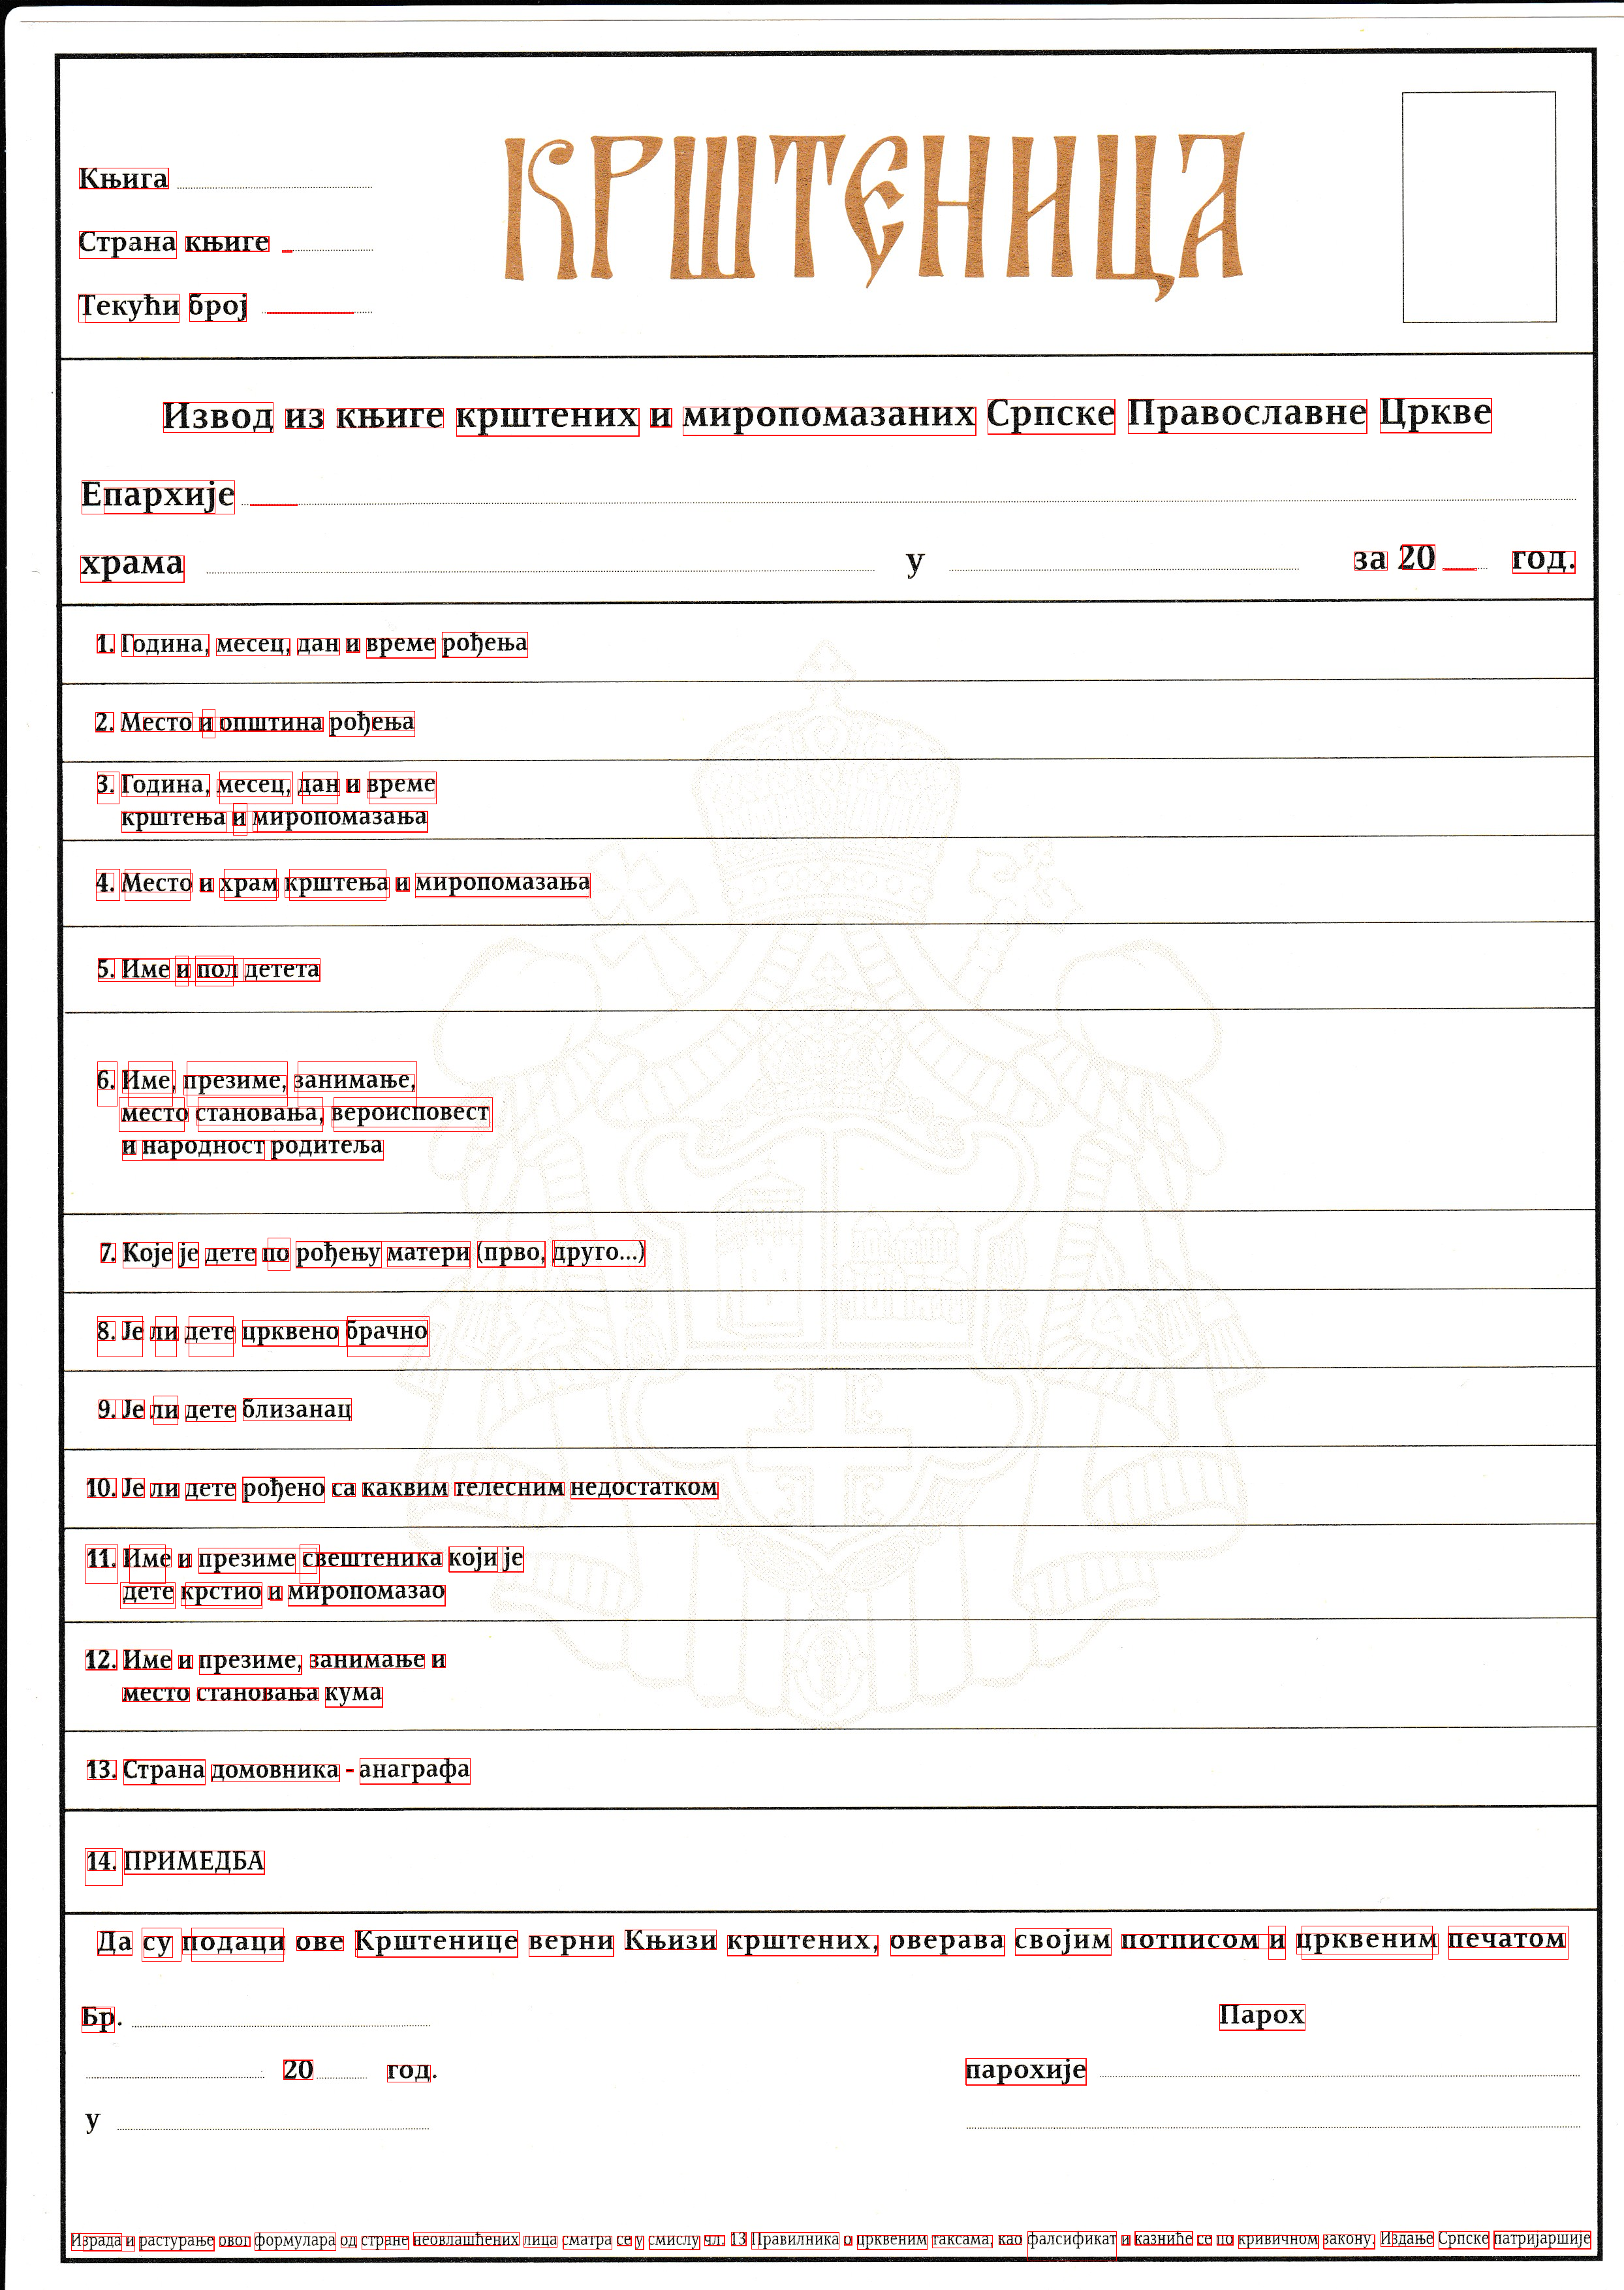

In [8]:
from PIL import ImageDraw
import pytesseract
from IPython.display import display


# Perform OCR to get data
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang="srp", config='--psm 11')

# Draw rectangles around detected text
draw = ImageDraw.Draw(image)
n_boxes = len(data['text'])

confidence = 0
for i in range(n_boxes):
    if int(data['conf'][i]) > confidence:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        draw.rectangle([x, y, x + w, y + h], outline='red')

# Display the image inline in the notebook
display(image)


In [16]:
n_boxes = len(data['text'])
filters = ("1.", "месец,", "дан", "и", "време", "рођења", "Израда", "патријаршије")
for i in range(n_boxes):
    text = data["text"][i]
    # if text in filters:
    (x, y, w, h) = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
    x_mm = x * 0.08440514469453377
    y_mm = y * 0.0846636259977195
    # Create a div element with inline CSS for position
    print(f'<div class="absolute-text" style="position: fixed; top: {round(y_mm, 3)}mm; left: {round(x_mm, 3)}mm;">{text}</div>')


<div class="absolute-text" style="position: fixed; top: 0.0mm; left: 0.0mm;"></div>
<div class="absolute-text" style="position: fixed; top: 21.759mm; left: 10.213mm;"></div>
<div class="absolute-text" style="position: fixed; top: 21.759mm; left: 10.213mm;"></div>
<div class="absolute-text" style="position: fixed; top: 21.759mm; left: 10.213mm;"></div>
<div class="absolute-text" style="position: fixed; top: 21.759mm; left: 10.213mm;">Књига</div>
<div class="absolute-text" style="position: fixed; top: 24.298mm; left: 22.958mm;">__.</div>
<div class="absolute-text" style="position: fixed; top: 29.971mm; left: 10.213mm;"></div>
<div class="absolute-text" style="position: fixed; top: 29.971mm; left: 10.213mm;"></div>
<div class="absolute-text" style="position: fixed; top: 29.971mm; left: 10.213mm;"></div>
<div class="absolute-text" style="position: fixed; top: 29.971mm; left: 10.213mm;">Страна</div>
<div class="absolute-text" style="position: fixed; top: 30.648mm; left: 23.971mm;">књиге</di

## Како се координате скалирају у мм

In [12]:
from PIL import Image

# Get image dimensions in pixels
image_width_px, image_height_px = image.size

# A4 dimensions in millimeters
a4_width_mm, a4_height_mm = 210, 297

# Calculate scaling factors
scale_x = a4_width_mm / image_width_px
scale_y = a4_height_mm / image_height_px

# Print out the results
print(f"Image dimensions: {image_width_px} x {image_height_px} pixels")
print(f"Scaling factors: x={scale_x}, y={scale_y}")


Image dimensions: 2488 x 3508 pixels
Scaling factors: x=0.08440514469453377, y=0.0846636259977195
